<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/3rdWeekTask/Decision_Tree_and_K_NN_for_Creditdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           1       0.78      0.87      0.82       141
           2       0.56      0.41      0.47        59

    accuracy                           0.73       200
   macro avg       0.67      0.64      0.64       200
weighted avg       0.71      0.73      0.72       200

Accuracy: 0.73

K-Nearest Neighbors Classifier Performance:
              precision    recall  f1-score   support

           1       0.81      0.94      0.87       141
           2       0.76      0.49      0.60        59

    accuracy                           0.81       200
   macro avg       0.79      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200

Accuracy: 0.805


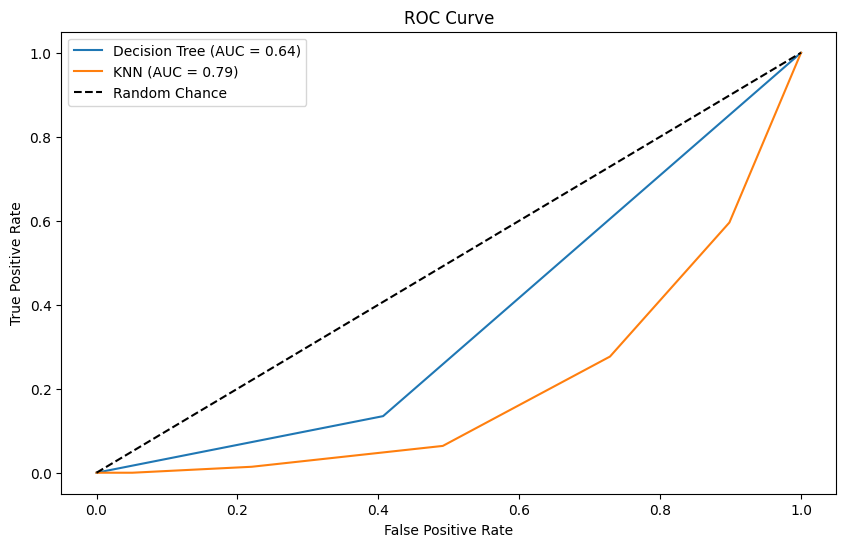

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assign path dataset
file_path = '/content/sample_data/CreditDataset.csv'
data = pd.read_csv(file_path)

# Bagi datanya menjadi features (X) dan target (y)
X = data.drop(columns=['Class'])  # Features berisi semua kolom kecuali class
y = data['Class']  # Target berisi hanya class

# ganti kolom yang masih string menjadi numberical
le = LabelEncoder()
X = X.apply(le.fit_transform)

# Bagi 2 menjadi training data dan test data (80(Training data) : 20(Test data))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi agar semua data bernilai sama
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# K-Nearest Neighbors Classifier (default k=5)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

# Prediksi
y_pred_dt = dt_classifier.predict(X_test_scaled)
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluasi metrics untuk Decision Tree
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Evaluasi metrics untuk K-Nearest Neighbors
print("\nK-Nearest Neighbors Classifier Performance:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Kurva ROC dan AUC untuk Decision Tree
y_pred_proba_dt = dt_classifier.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt, pos_label=1)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Kurva ROC dan AUC untuk KNN
y_pred_proba_knn = knn_classifier.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn, pos_label=1)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# Plot Kurva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
